In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [ ]:
data = pd.read_csv("/content/data_for_lr.csv")

In [ ]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
data.isnull().sum()

x    0
y    1
dtype: int64

Data Processing

In [ ]:
data = data.dropna()
print("Shape of data", data.shape)

Shape of data (699, 2)


Splitting Data

In [ ]:
# training input and output data

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# validation input and output

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [ ]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"testing input data shape = {test_input.shape}")
print(f"testing output data shape = {test_output.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
testing input data shape = (199, 1)
testing output data shape = (199, 1)


Linear Regression

Forward Propogation

f = m*x + c

In [ ]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

Cost Function

summation(1/2n*(y-f(x))^2)

In [ ]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

Gradient Descent for Backpropogation

In [ ]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

Update Parameters

In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

Model Training

In [ ]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

Training

Iteration = 1, Loss = 1851.0143341913258


<Figure size 640x480 with 0 Axes>

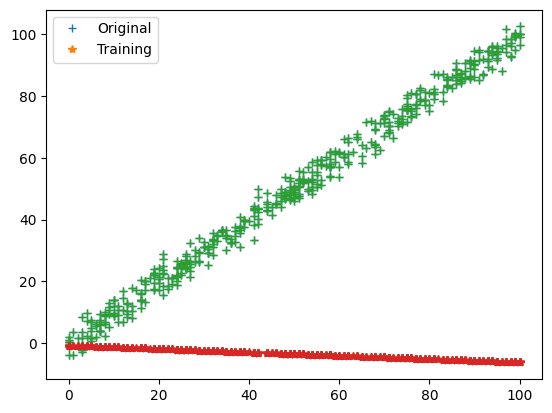

Iteration = 2, Loss = 841.9632005331256


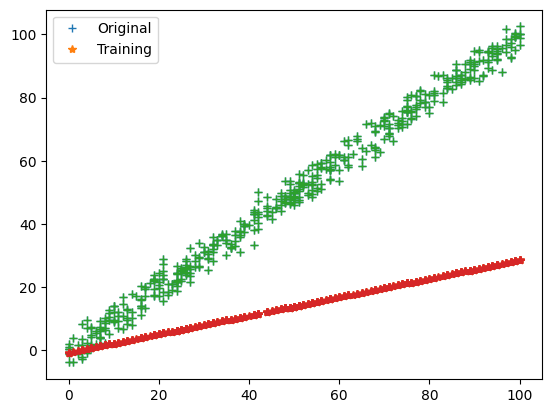

Iteration = 3, Loss = 384.1555825323473


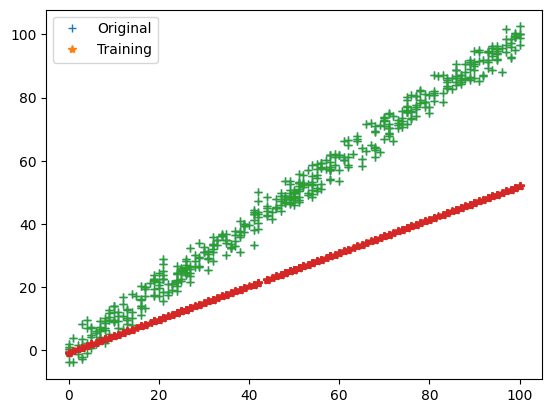

Iteration = 4, Loss = 176.4477581654288


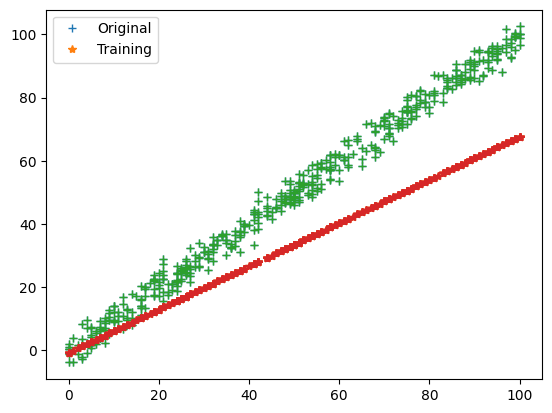

Iteration = 5, Loss = 82.21048719108154


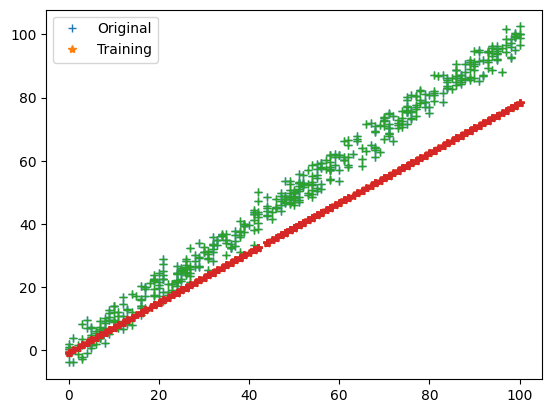

Iteration = 6, Loss = 39.45493197565549


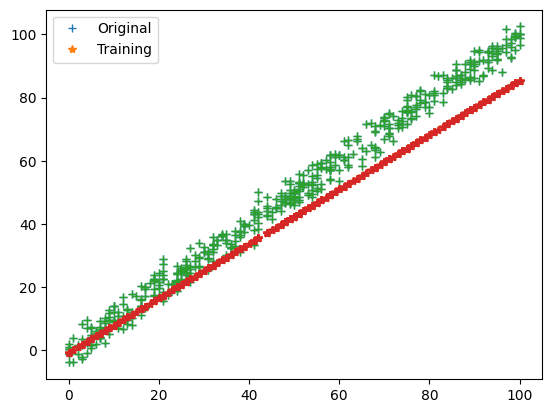

Iteration = 7, Loss = 20.056688223372106


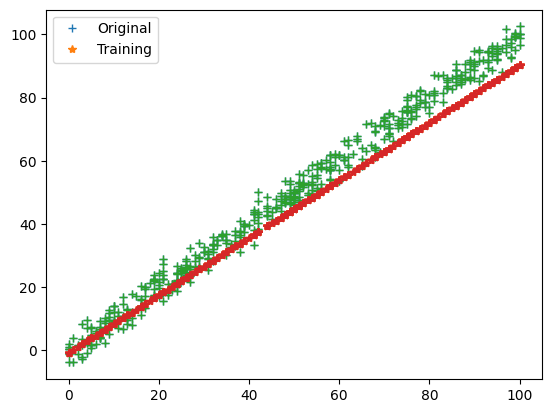

Iteration = 8, Loss = 11.255682553487409


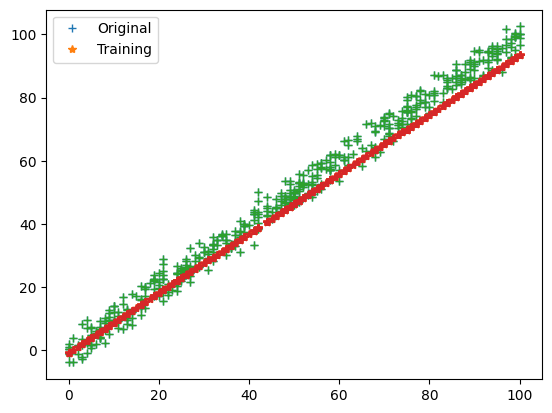

Iteration = 9, Loss = 7.262655539574691


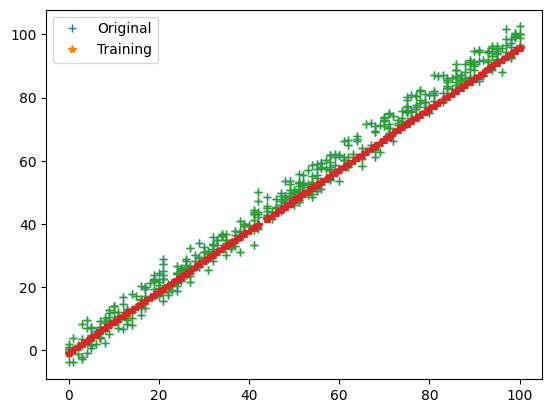

Iteration = 10, Loss = 5.451013767441799


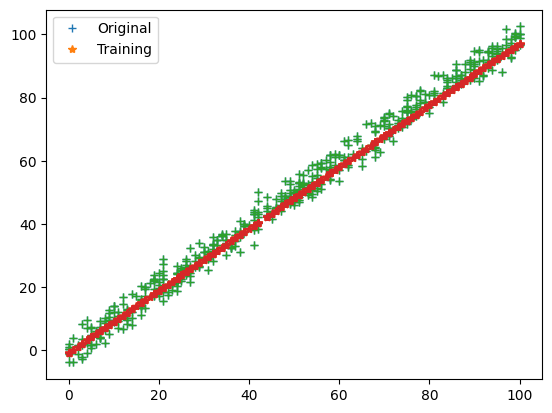

Iteration = 11, Loss = 4.629068895746649


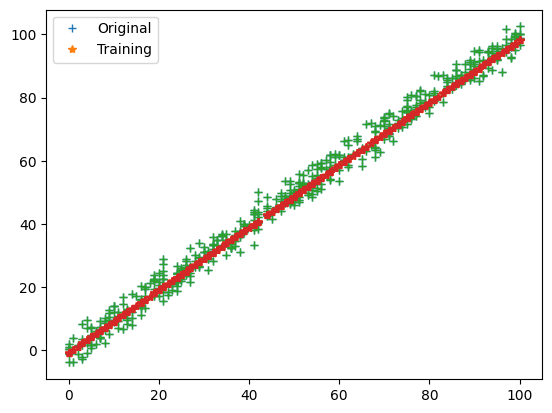

Iteration = 12, Loss = 4.256150604059195


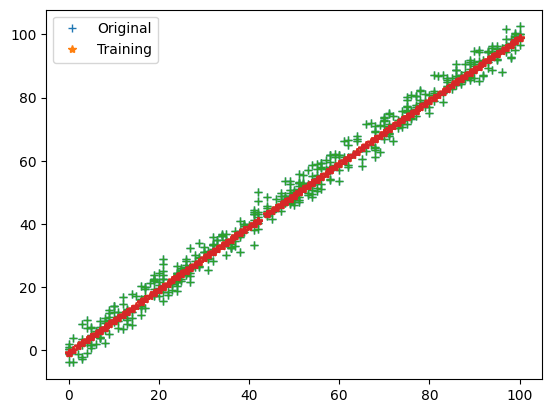

Iteration = 13, Loss = 4.086956169131599


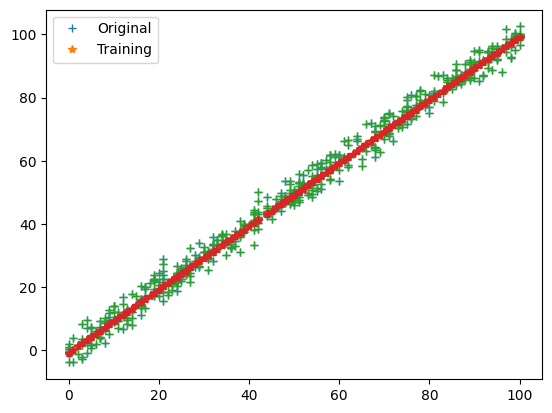

Iteration = 14, Loss = 4.010191473718907


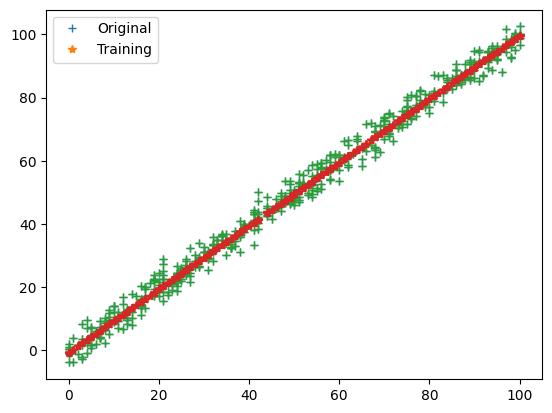

Iteration = 15, Loss = 3.9753622535531306


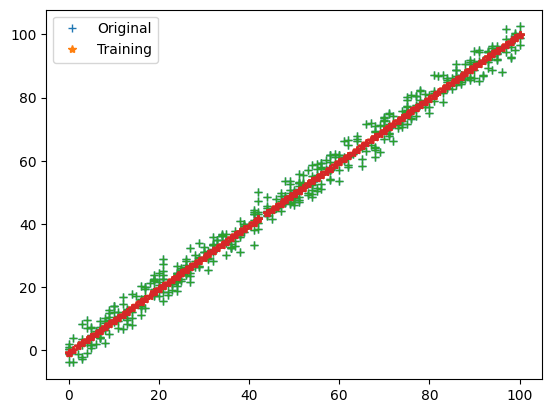

Iteration = 16, Loss = 3.9595592050063546


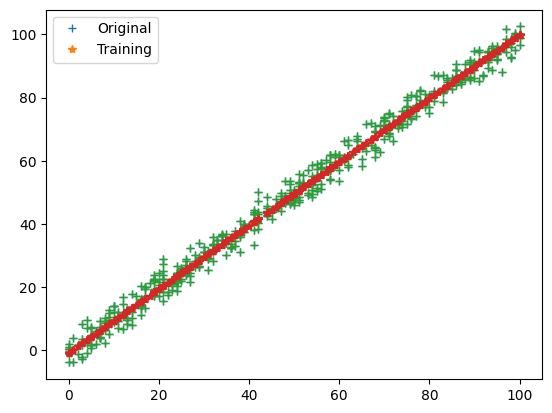

Iteration = 17, Loss = 3.9523883516472997


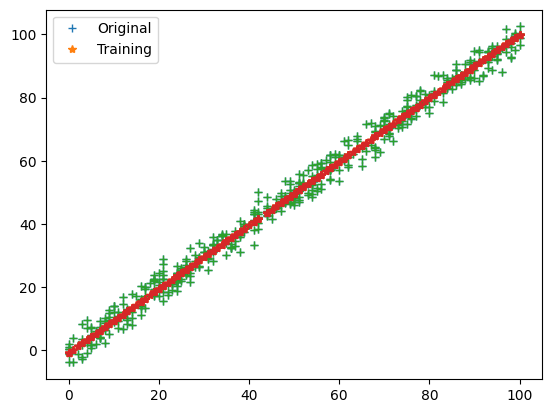

Iteration = 18, Loss = 3.9491339348562953


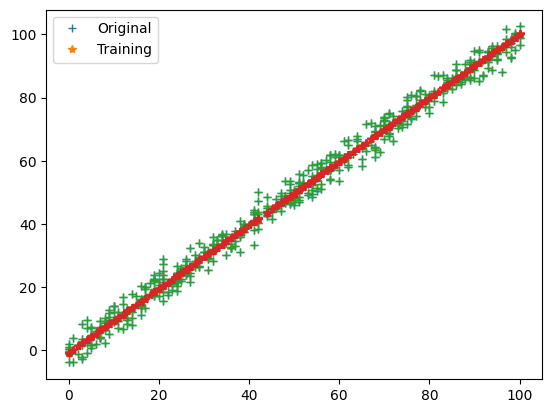

Iteration = 19, Loss = 3.947656409724226


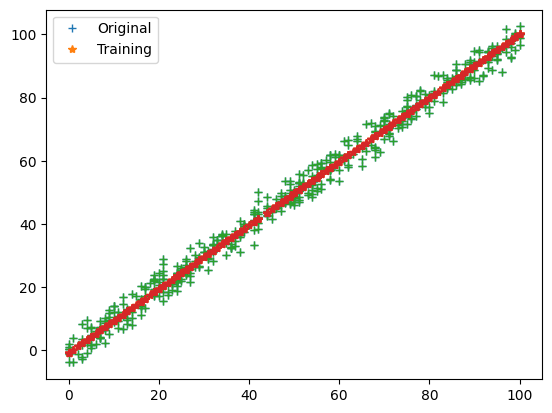

Iteration = 20, Loss = 3.946985062355978


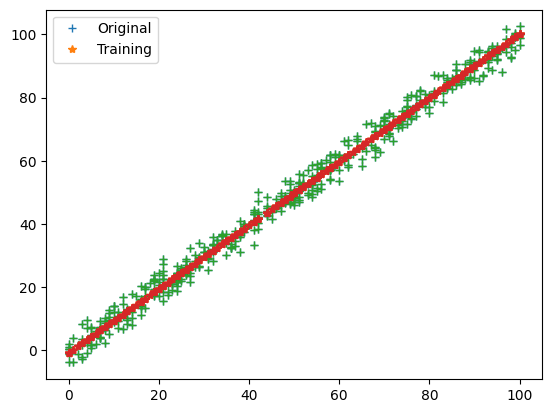

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameters)

{'m': 1.00870822082096, 'c': -0.7711364253493409}


In [ ]:
loss

[1851.0143341913258,
 841.9632005331256,
 384.1555825323473,
 176.4477581654288,
 82.21048719108154,
 39.45493197565549,
 20.056688223372106,
 11.255682553487409,
 7.262655539574691,
 5.451013767441799,
 4.629068895746649,
 4.256150604059195,
 4.086956169131599,
 4.010191473718907,
 3.9753622535531306,
 3.9595592050063546,
 3.9523883516472997,
 3.9491339348562953,
 3.947656409724226,
 3.946985062355978]

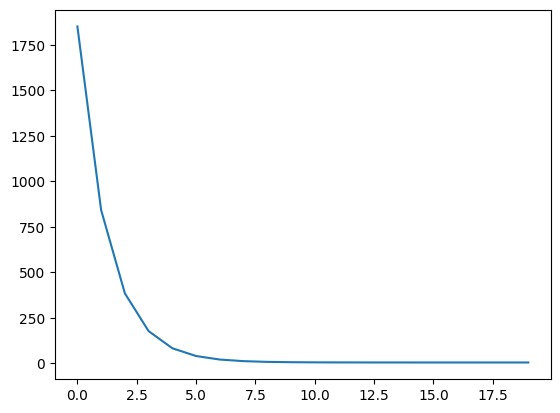

In [ ]:
plt.plot(loss)

Predicition

In [ ]:
test_prediciton = test_input * parameters['m'] + parameters['c']

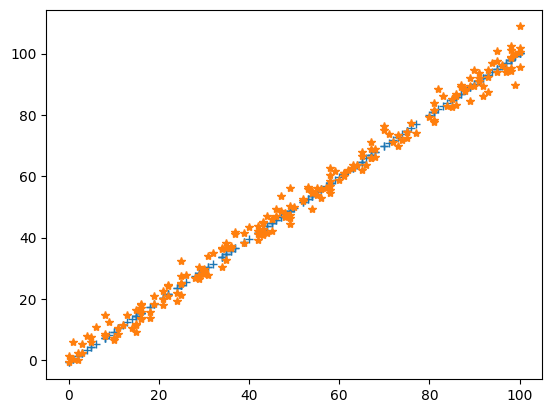

In [ ]:
plt.plot(test_input, test_prediciton, '+')
plt.plot(test_input, test_output, '*')
plt.show()

Cost for test data

In [ ]:
cost_function(test_prediciton, test_output)

4.1168203517485065